### MODIS_burned-area_proprocessor.ipynb

!/usr/bin/env python

    File name: MODIS_burned-area_proprocessor.ipynb
    Author: Andreas Prein
    E-mail: prein@ucar.edu
    Date created: 05.04.2017
    Date last modified: 05.04.2017

    ##############################################################
    Purpos:

    Reads in hdf data that was downloaded from the following ftp server:
    wget -m ftp://ba1.geog.umd.edu/Collection6/HDF/ --ftp-user=user --ftp-password=burnt
    
    More information about this dataset can be found here:
    http://modis-fire.umd.edu/files/MODIS_C6_BA_User_Guide_1.2.pdf

    Transforms the original data to daily NetCDFs and stores them.

In [15]:
from dateutil import rrule
import datetime
from datetime import timedelta
import glob
from netCDF4 import Dataset
import netCDF4
import sys, traceback
import dateutil.parser as dparser
import string
from pdb import set_trace as stop
import numpy as np
import numpy.ma as ma
import os
from mpl_toolkits import basemap
# import ESMF
import pickle
import subprocess
import pandas as pd
from scipy import stats
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import pylab as plt
import random
import scipy.ndimage as ndimage
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from pylab import *
import string
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import shapefile
import shapely.geometry
import shapefile
import math
from scipy.stats.kde import gaussian_kde
from math import radians, cos, sin, asin, sqrt
from shapely.geometry import Polygon, Point
from scipy.interpolate import interp1d
import csv
import os.path
import matplotlib.gridspec as gridspec
import matplotlib.path as mplPath
from scipy import stats
from matplotlib.mlab import griddata
from cartopy import config
import cartopy.crs as ccrs
import cartopy
from cartopy.feature import NaturalEarthFeature
import cartopy.io.shapereader as shpreader
from shutil import copyfile
from matplotlib import path
from mpl_toolkits.basemap import Basemap; bm = Basemap()
from scipy.interpolate import interp1d
import scipy
from mpl_toolkits.basemap import Basemap; bm = Basemap()
from scipy import signal
from random import randrange
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata
from pyhdf.SD import SD, SDC

### Settings

In [3]:
DataDir='/glade/campaign/mmm/c3we/prein/observations/Fire-observations/MODIS_burned-area-product/ba1.geog.umd.edu/Collection6/HDF/2001/001/MCD64A1.A2001001.h17v07.006.2017012053356.hdf'
SaveDir='/glade/campaign/mmm/c3we/prein/observations/Fire-observations/MODIS_burned-area-product/data'

dStartDay=datetime.datetime(2000, 1, 1,0)
dStopDay=datetime.datetime(2017, 12, 31,0)
rgdTimeDD = pd.date_range(dStartDay, end=dStopDay, freq='d')
iYearsAll=np.unique(rgdTimeDD.year)

### Load and process data

In [19]:
file = SD(DataDir, SDC.READ)
datasets_dic = file.datasets()
for idx,sds in enumerate(datasets_dic.keys()):
    print idx,sds

0 Burn Date
1 Burn Date Uncertainty
2 QA
3 Last Day
4 First Day


In [31]:
sds_obj = file.select('Burn Date') # select sds
data = sds_obj.get() # get sds data

In [37]:
data.shape

(2400, 2400)

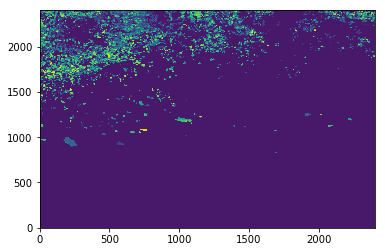

In [36]:
plt.contourf(data); plt.show()